## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
import string
import os

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [2]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/homeworks_basic/Lab2_DL/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]

n_lines = len(text)
max_line = max(map(len, text))

assert len(text) == 2616

print('Число строк :', n_lines,'Длина самой длиной строки :', max_line, sep = '\n')

Число строк :
2616
Длина самой длиной строки :
63


In [3]:
new_text = []
for i in range(len(text)):
    new_text += text[i]

text = new_text
for i in range(len(text)):
    if text[i] in string.ascii_uppercase:
        text[i] = text[i].lower()

assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

### Data loading: "Евгений Онегин"


In [ ]:
# !wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r', encoding='utf-8') as iofile:
    text = iofile.readlines()
    
text = [x.replace('\t\t', '') for x in text]

"C:\Program" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
# print(text)

new_text = []
for i in range(len(text)):
    new_text += text[i]

text = new_text
for i in range(len(text)):
    if text[i] in string.ascii_uppercase:
        text[i] = text[i].lower()

# assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')
print(text)

OK!
['\n', 'i', '\n', '\n', '«', 'М', 'о', 'й', ' ', 'д', 'я', 'д', 'я', ' ', 'с', 'а', 'м', 'ы', 'х', ' ', 'ч', 'е', 'с', 'т', 'н', 'ы', 'х', ' ', 'п', 'р', 'а', 'в', 'и', 'л', ',', '\n', 'К', 'о', 'г', 'д', 'а', ' ', 'н', 'е', ' ', 'в', ' ', 'ш', 'у', 'т', 'к', 'у', ' ', 'з', 'а', 'н', 'е', 'м', 'о', 'г', ',', '\n', 'О', 'н', ' ', 'у', 'в', 'а', 'ж', 'а', 'т', 'ь', ' ', 'с', 'е', 'б', 'я', ' ', 'з', 'а', 'с', 'т', 'а', 'в', 'и', 'л', '\n', 'И', ' ', 'л', 'у', 'ч', 'ш', 'е', ' ', 'в', 'ы', 'д', 'у', 'м', 'а', 'т', 'ь', ' ', 'н', 'е', ' ', 'м', 'о', 'г', '.', '\n', 'Е', 'г', 'о', ' ', 'п', 'р', 'и', 'м', 'е', 'р', ' ', 'д', 'р', 'у', 'г', 'и', 'м', ' ', 'н', 'а', 'у', 'к', 'а', ';', '\n', 'Н', 'о', ',', ' ', 'б', 'о', 'ж', 'е', ' ', 'м', 'о', 'й', ',', ' ', 'к', 'а', 'к', 'а', 'я', ' ', 'с', 'к', 'у', 'к', 'а', '\n', 'С', ' ', 'б', 'о', 'л', 'ь', 'н', 'ы', 'м', ' ', 'с', 'и', 'д', 'е', 'т', 'ь', ' ', 'и', ' ', 'д', 'е', 'н', 'ь', ' ', 'и', ' ', 'н', 'о', 'ч', 'ь', ',', '\n', 'Н', 'е', 

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [ ]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here


Put all the characters, that you've seen in the text, into variable `tokens`.

In [4]:
tokens = sorted(set(text))
tokens

['\n',
 ' ',
 '!',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [5]:
token_to_idx = {token: i for i, token in enumerate(tokens)}
idx_to_token = {i: token  for i, token in enumerate(tokens)}
print(token_to_idx, idx_to_token, sep= '\n')

{'\n': 0, ' ': 1, '!': 2, "'": 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, ':': 9, ';': 10, '?': 11, 'a': 12, 'b': 13, 'c': 14, 'd': 15, 'e': 16, 'f': 17, 'g': 18, 'h': 19, 'i': 20, 'j': 21, 'k': 22, 'l': 23, 'm': 24, 'n': 25, 'o': 26, 'p': 27, 'q': 28, 'r': 29, 's': 30, 't': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35, 'y': 36, 'z': 37}
{0: '\n', 1: ' ', 2: '!', 3: "'", 4: '(', 5: ')', 6: ',', 7: '-', 8: '.', 9: ':', 10: ';', 11: '?', 12: 'a', 13: 'b', 14: 'c', 15: 'd', 16: 'e', 17: 'f', 18: 'g', 19: 'h', 20: 'i', 21: 'j', 22: 'k', 23: 'l', 24: 'm', 25: 'n', 26: 'o', 27: 'p', 28: 'q', 29: 'r', 30: 's', 31: 't', 32: 'u', 33: 'v', 34: 'w', 35: 'x', 36: 'y', 37: 'z'}


In [6]:
assert len(tokens) == len(token_to_idx), "dictionaries must have same size"

for i in range(len(tokens)):
    assert token_to_idx[tokens[i]] == i, "token identifier must be it's position in tokens list"

print("Seems alright!")

Seems alright!


In [7]:
print(len(text))
print(type(text))


100225
<class 'list'>


*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [8]:
# Your code here
from IPython.display import clear_output
import numpy as np
import torch, torch.nn as nn
import torch.nn.functional as F
import math as mt 
import matplotlib.pyplot as plt
import random
from random import sample
%matplotlib inline


def to_matrix(names, max_len=None, pad=token_to_idx[' '], dtype='int32', batch_first=True):
    """Casts a list of names into rnn-digestable matrix"""
    
    max_len = max_len or max(map(len, names))
    names_idx = np.zeros([len(names), max_len], dtype) + pad

    for i in range(len(names)):
        line_idx = [token_to_idx[c] for c in names[i]]
        names_idx[i, :len(line_idx)] = line_idx
        
    if not batch_first: # convert [batch, time] into [time, batch]
        names_idx = np.transpose(names_idx)

    return names_idx

In [9]:
class CharRNNCell(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=38, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, containing vector of int64
        :param h_prev: previous rnn hidden states, containing matrix [batch, rnn_num_units] of float32
        """
        # get vector embedding of x
        # batch, seq leng, emb dim
        x_emb = self.embedding(x)
        
        # compute next hidden state using self.rnn_update
        # hint: use torch.cat(..., dim=...) for concatenation
        x_and_h = torch.cat([x_emb, h_prev], dim=-1) # YOUR CODE HERE
        h_next = self.rnn_update(x_and_h) # YOUR CODE HERE
        
        h_next = torch.tanh(h_next) # YOUR CODE HERE
        
        assert h_next.size() == h_prev.size()
        
        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next) # YOUR CODE
        
        return h_next, logits
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units, requires_grad=True)

In [10]:
def rnn_loop(char_rnn, batch_ix):
    """
    Computes log P(next_character) for all time-steps in names_ix
    :param names_ix: an int32 matrix of shape [batch, time], output of to_matrix(names)
    """
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logprobs = []

    for x_t in batch_ix.transpose(0,1):
        hid_state, logits = char_rnn(x_t, hid_state)  # <-- here we call your one-step code
        logprobs.append(F.log_softmax(logits, -1))
        
    return torch.stack(logprobs, dim=1)

In [11]:
batch_size=10
batches = np.split(np.array(text),np.linspace(0, len(text),n_lines//10, dtype=int ))
char_rnn = CharRNNCell()
criterion = nn.NLLLoss()
num_tokens = len(tokens)

In [12]:
batch_ix = to_matrix(batches[0:batch_size + 1])
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

logp_seq = rnn_loop(char_rnn, batch_ix)

assert torch.max(logp_seq).data.numpy() <= 0
assert tuple(logp_seq.size()) ==  batch_ix.shape + (num_tokens,)

predictions_logp = logp_seq[:, :-1]
actual_next_tokens = batch_ix[:, 1:]

# .contiguous() method checks that tensor is stored in the memory correctly to 
# get its view of desired shape.

loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), 
                  actual_next_tokens.contiguous().view(-1))
loss.backward()
for w in char_rnn.parameters():
    assert w.grad is not None and torch.max(torch.abs(w.grad)).data.numpy() != 0, \
        "Loss is not differentiable w.r.t. a weight with shape %s. Check forward method." % (w.size(),)

In [13]:
char_rnn = CharRNNCell()
criterion = nn.NLLLoss()
opt = torch.optim.Adam(char_rnn.parameters())
history = []

MAX_LENGTH = max_line*10

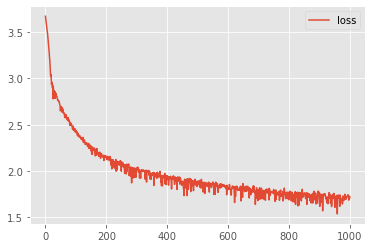

In [14]:
batch_size = 20
for i in range(1000):
    opt.zero_grad()
    
    batch_ix = to_matrix(sample(batches, batch_size))
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logp_seq = rnn_loop(char_rnn, batch_ix)
    
    # compute loss
    predictions_logp = logp_seq[:, :-1] # YOUR CODE HERE
    actual_next_tokens = batch_ix[:, 1:] # YOUR CODE HERE
    
#     print(predictions_logp.shape, actual_next_tokens.shape)
    loss = criterion(
        predictions_logp.contiguous().view(-1, num_tokens),
        actual_next_tokens.contiguous().view(-1)
    ) 
    # YOUR CODE HERE
    
    # train with backprop
    loss.backward()
    opt.step()
    
    # YOUR CODE HERE
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.style.use('ggplot')
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

Plot the loss function (axis X: number of epochs, axis Y: loss function).

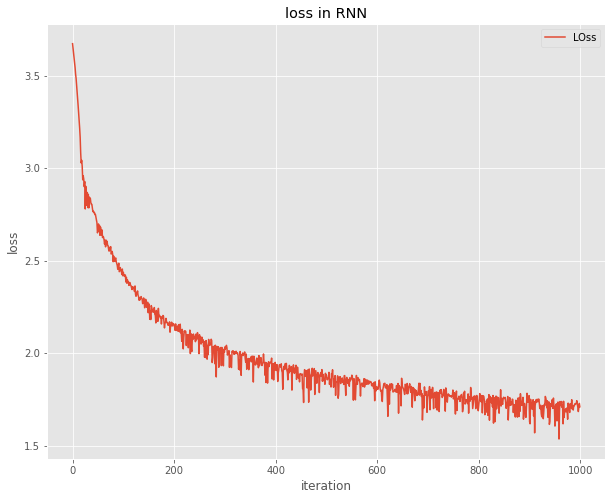

In [15]:
plt.figure(figsize=(10, 8))
plt.title("loss in RNN")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(history, label = 'LOss')
plt.legend()    
plt.style.use('ggplot')
plt.show()

In [39]:
def Generate_sample(char_rnn, seed_phrase='hello', max_length=MAX_LENGTH, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        hid_state, logits = char_rnn(x_sequence[:, -1], hid_state)
        p_next = F.softmax(logits / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens,p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [40]:
print(Generate_sample(char_rnn, max_length=600, temperature=0.8))

hellor of loving you gonctore, of slefest'd no prake,
  the stare,
    seed say i batned me, angand, whink on thy chair love dust wis thuch thing on, and to no i that i fair blime,
  the thy ean'st on the tiveess concetied, suen beave, thiss time hatw' be end still doth to dote sunger,
  so thee, dot as upen will me spoort, thy byep sind;
  self farvence long up should no not may
  thak for gay the such brade thee it in the feast you my pheil self of still,
  saint the:
  to to me all my lie that beting hase sun love dearing do kel's cryence loves shall whose of grall.
  the llacl, my such wil


In [ ]:
# An example of generated text.
# print(generate_text(length=500, temperature=0.2))

hide my will in thine?
  shall will in of the simend that in my sime the seave the seave the sorll the soren the sange the seall seares and and the fart the wirl the seall the songh whing that thou hall will thoun the soond beare the with that sare the simest me the fart the wirl the songre the with thy seart so for shat so for do the dost the sing the sing the sing the soond canding the sack and the farling the wirl of sore sich and that with the seare the seall so fort the with the past the wirl the simen the wirl the sores the sare


### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [19]:
# Your beautiful code here
class LSTMLoop(nn.Module):
    def __init__(self, num_tokens=len(tokens), emb_size=len(tokens), rnn_num_units=128):
        super(self.__class__, self).__init__()
        self.num_layers = 2 
        self.rnn_num_units = rnn_num_units
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.LSTM(emb_size, self.rnn_num_units,
                           num_layers=self.num_layers,
                           batch_first=True, dropout=0.2)
#         self.rnn = nn.LSTM(emb_size, self.rnn_num_units, batch_first=True)
        self.hid_to_logits = nn.Linear(self.rnn_num_units, num_tokens)
        
    def forward(self, x, prev_state):
        # assert isinstance(x.data, torch.LongTensor)
        embed = self.emb(x)
        output, state = self.rnn(self.emb(x), prev_state)
        logits = self.hid_to_logits(output)
        return logits, state
    
    def initial_state(self, batch_size):
        return (torch.zeros(self.num_layers, batch_size, self.rnn_num_units, requires_grad=True),
                torch.zeros(self.num_layers, batch_size, self.rnn_num_units, requires_grad=True))


In [20]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)
num_tokens=len(tokens)

cuda:0


In [21]:
model = LSTMLoop()
model.to(device)
opt = torch.optim.Adam(model.parameters())
criterion = nn.NLLLoss()

history = []
batch_size = 20
seq_length = 4

In [22]:
batches = np.split(np.array(text),np.linspace(0, len(text),n_lines//10, dtype=int )) # разделим по ~ 10 строк.
print(len(batches))
batch_size = 20 

262


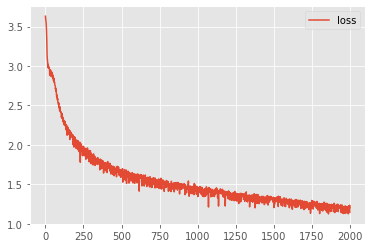

In [23]:
import random
from random import sample

for i in range(2000):
    batch_ix = to_matrix( random.sample(batches, int(batch_size)) ) #  семплируем batch_size кусков из батчсайза.
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64).to(device)
    
    state_h, state_c = model.initial_state(batch_size)
    
    y_pred, (state_h, state_c) = model(batch_ix, (state_h.to(device), state_c.to(device)))
    
    logp_seq = F.log_softmax(y_pred, dim=-1)
    
    state_h = state_h.detach()
    state_c = state_c.detach()
    
    predictions_logp = logp_seq[:, :-1] # YOUR CODE HERE
    actual_next_tokens = batch_ix[:, 1:] # YOUR CODE HERE

    loss = criterion(
        predictions_logp.contiguous().view(-1, num_tokens),
        actual_next_tokens.contiguous().view(-1)
    )
    # YOUR CODE HERE
    
    # train with backprop
    
    # YOUR CODE HERE
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    history.append(loss.data.cpu().numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."
    

In [24]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


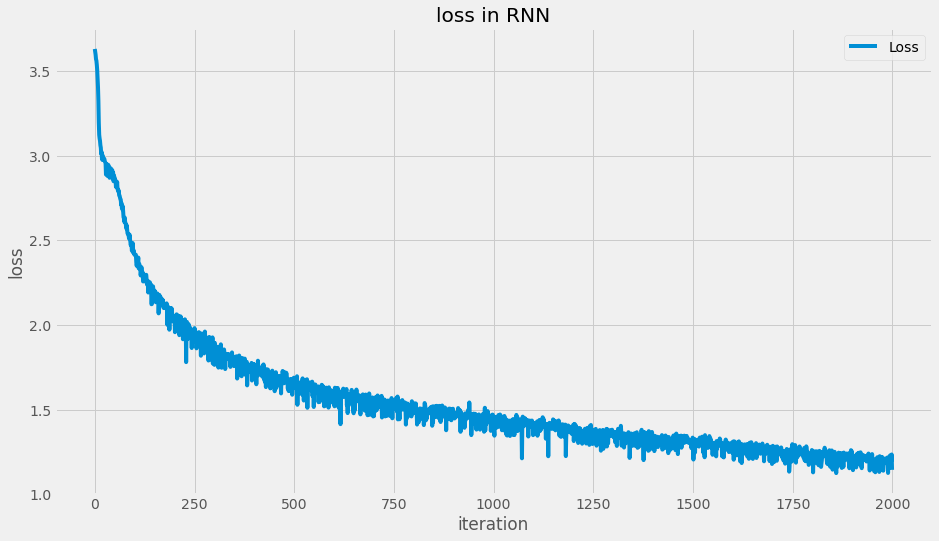

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 8))
plt.title("loss in RNN")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(history, label = 'Loss')
plt.legend()    
plt.show()

In [26]:
MAX_LENGTH = 500
def generate_sample(model, seed_phrase='hello', max_length=MAX_LENGTH, temperature = 1.0):

    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([[x_sequence]], dtype=torch.int64).to(device)
    (state_h, state_c) = model.initial_state(batch_size = 1)
    
    for i in range(len(seed_phrase) - 1):
        y_pred, (state_h, state_c) = model(x_sequence[:, :, i], (state_h.to(device), state_c.to(device)))

    for _ in range(max_length - len(seed_phrase)):
        y_pred, (state_h, state_c) = model(x_sequence[:, :, -1], (state_h.to(device), state_c.to(device)))
        last_logit = y_pred[0, -1]
        p_next = F.softmax(last_logit / temperature, dim=0).data.cpu().numpy()
        
        next_ix = np.random.choice(len(tokens), p=p_next)
           
        next_ix = torch.tensor([[[next_ix]]], dtype=torch.int64)
        
        x_sequence = torch.cat((x_sequence.cpu(), next_ix), dim=-1).to(device)
 
    return ''.join([tokens[ix] for ix in x_sequence.data.cpu().numpy()[0, 0]])

In [27]:
print(generate_sample(model, max_length = 1000, temperature=0.5))


helloved the looks where you your eye.
  and therefore of thy beauty of thee,
    me praise of his sprit of youth me doth see,
    then my soul that see wish the strong intected,
  wherefore our things where grows confounds are contross.

  cxxxi

  o! for i seen most which this since i strange,
  and in the than and should to give and see
  thy worth in for the will with from thy selv,
    and straight though the art better hell deceaved.
  o! let the world muse as thou art not,
  the see thy meartion thee is the confess
  that i where the pleasure with me doth she doth think,
  hath graven should in the parts to the beauty,
  and shall gave the marreet of the ornendess,
  and so the counternets the chanse how steed,
  and all that i may be bith forth of his sweet
  love, one true vacious to our all evereguint;
  the painting with they thou shadow's holest lie,
  when thou art not to summon my sind,
  what in day is my fieds me to me doth be.

  cxiii

  the world that i for nothing m

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [28]:
# Text generation with different temperature values here
print(generate_sample(model, max_length = 1000, temperature=0.1))

hellow it with the world and then,
  when i though in the sweet self alone should show
  that thou art thou art the stant strange made,
    and then the fair the restore of thy self-decares,
  and the parts of the think on the shall be so,
  and in my seem that thou art beauty's green,
  and therefore that the surmer state to decay.

  lxxxv

  the world that thou thy self the world to me,
  and therefore the strange is the such strange,
  and thou art the steel that the strange is to despise,
  and therefore the countance all one many stringed,
  and prove the world to me the sweet self so state,
  which though the sweet self the works my love thee,
  and in the sun mering the child thee,
  wherefore shall state the store of the self,
    and the self the world to the store doth sight,
  and then thou are when i do show in my self,
  which is the sun in the self alone mad strange;
  when i am shall i soul i then the strange,
  and the present as the world in thee,
  the love the surme

In [ ]:
print(generate_sample(model, max_length = 1000, temperature=0.2))

hellour see the summer's show,
  which in the present of thy strong the cheeks,
  which thy strange that i have so strong,
    that the store thou dost not so show state,
  and then thy self that the thing then shall,
    the such that the world to shall sen every
  the praise of thee that thou mayst then,
    that thou shalt should the world of thee shade,
  and they shall the truth to the sport of spent,
  and then mayst the world thou theer stare thou stard
  the sen so self-lives that the strong thee,
  when thou art the grown that thou art thee,
    the love that thou the strange the lies thee,
  and then the world to be the thing this state
  the day thou mayst thy store thou shalt store,
  and thou art the world of the short as might
  than thou art the second state to the true,
  and therefore the world and thou art me store.
    if thou art the surive the thing thee best,
  and therefore shall shall beauty should to cheare,
  that thou art the world and their shall stand,
  th

In [29]:
print(generate_sample(model, max_length = 1000, temperature=1.0))

hellow:- thou prof'st that, a dear yor me,
  who rose their lenthes of the difine wrat
  times suprach of remed:
  how which they blestreatue in your delied,
  nor should vow'd fore my guss you dave,
  and thou wild thac, like eyes you growed;
    the strong looks say, in accottane will stow
  thy unforgetbers no green hears hate mignt cloai
  not spot with out, against thee born then.
  thee, mer i war in where from there men.

  xii

  thy lose lies more burned hunder converse;
  that lines that yet so monking purish,
  o vulger shade me, so she star no heir,
  and sight time's sel-flesting to ruch feater receiv,
  that thrue strangies depare and worth they
  her mongue bed with my foaths make say
  pestinate, but forting taker,
  the dailence mones should acgift for halp.

  

  cxlviii

  and three i do you you trome rest so face?
  yet live tond all yet be such her till.
    till not gentle shout to score in my love,
  my flesh lips that whetered poese your dear
  or dare acquence

In [30]:
print(generate_sample(model, max_length = 1000, temperature=2.0))

hellope, let madefucgy'f a n-nyvy.

  l
!
  led-tif! thnus'd makewy his; whociir
  phictsing, eavinums way whos, rafise
  watmjrouationder hasr to gendant;
  muth fyer noge'chi's loakif eam hep:
  no 'thes howade thy briendy's feace's's clhe'ings ifl'! night.

  cis
  egraz,' iink offeokle,
  pormer loves, hu perfeot weed ils-yecelf.)

  xqvix

  a lothlerd, anct self calse, andmix:-, hite,
  a wrowsbther ers'd of, tolahene: hum yishv?
  heirfue?s simple i surftel lvoy
  oy, id frify s,in, white not-'gup see:
  for yuth se with my shode, any what beeliqrei:
  gnor, efegeliz'd, coid swour; 'tkrpeching is lline!
  th yece;n much,'l--ime:
   mys au; o wormi' a presenfpaci'dien?
  'hrow d'scy chrrwstleasilgor gufd woinc'd.
  quent, mibe, prezert in reaegtiot;
  frham, injutg, space, ustymes -ot gud othless
  saave' everamsus'd that thee. nunkion, dowmorol's fie isrdue,
  tha' each which, 'esose hly thyulg, beooee;m thes, is,s kley, yeair yiths' piek to revaht:
  'fespreittei,; (heany's lea

### Saving and loading models

Обе сохраненные модели обучены на Шекспире.

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [44]:
torch.save(char_rnn.state_dict(), r"C:\Users\Aleksandr\Desktop\python\university\lab_2\CharRNN.pth")


In [47]:
model_RNN = CharRNNCell()
model_RNN.load_state_dict(torch.load(r"C:\Users\Aleksandr\Desktop\python\university\lab_2\CharRNN.pth"))


<All keys matched successfully>

In [49]:
print(Generate_sample(model_RNN, max_length=600, temperature=0.6))

hellow thou i with that shear dester shee will thou beauty
  on the shall my my plower in to sull thee hon deepull age freastrels and love
  the see,
    that that my leave you of out the thou with shall fore, gay thou world and live day on in that to much the prome.
                                                                                                                                                                                                                                                                                                         so sing mings, and sing wate to tho


In [34]:
# Saving and loading code here
torch.save(model.state_dict(), r"C:\Users\Aleksandr\Desktop\python\university\lab_2\LSTMLoop.pth")

In [36]:
device = torch.device("cuda")
model_1 = LSTMLoop()
model_1.load_state_dict(torch.load(r"C:\Users\Aleksandr\Desktop\python\university\lab_2\LSTMLoop.pth"))
model_1.to(device)

LSTMLoop(
  (emb): Embedding(38, 38)
  (rnn): LSTM(38, 128, num_layers=2, batch_first=True, dropout=0.2)
  (hid_to_logits): Linear(in_features=128, out_features=38, bias=True)
)

In [37]:
print(generate_sample(model_1, max_length = 1000, temperature=2.0))

hellop victhe!
  no'e trutneqsei-ylh: as oo losy,
  a sumrrosness uphadloost imemfeask:
  whily, thy looky haenst maniry seldjby,
  in imsteraste o, you, mine, baver'ed hw-will how stlond
  since,-n kint hireh-fasce,s urnire's of are?
  glae:-is :ccwastlix miguts ren upon
  all rame my 'owh-afjesfl dyling,
  mik one lack, ungarings feie,'s cavlonming iirrend!
  'is arow hagcarlunoidnk'd ten ple'sun's beast;
   vrotiylss that, nre you, my fart aay, delich::,
 s wit t!o me-pasregleds, for. not, of dade,
    be ariclangn dy, kagasp tide king-face;f- b?:
 o hid yep hlichand with aw'mrelnincur:;
  thal-wraty live woinfols, o'ght hor pitile!
  keap loogs, upon 'thouor is moan,--lilu'scsoen

  if that will doth gieks; wide housed it,;
  sthefbe,-rsto? fonfir, am w'sthowvinkneuts.
  loke toos, hrazed rosets nims govgiy.
' ix livlack.
  estin thinjpituarlh foil's sw'd rebrad dwispord,
  wentame byallsm: were my thos's, acl know(maght?i
  unupbnerig is adwelzs go?'d;   i xfar wiotwo'd past eyen,

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)